# Chicago Crime Analysis

With the increase in the number of crimes taking place in Chicago, law enforcement agencies are trying their best to understand the reason behind such actions. Analyses like these can not only help understand the reasons behind these crimes , but the can also prevent other crimes

## Problem Statement

Analyze and explore the Chicago Crime Dataset to understand trends and patterns that will help predict any future occurences of such felonies

For the analysis of this dataset, the columns are:

1. ID - Identifier of the record
2. Case Number - The Chicago Police Chain RD number
3. Date - Date of the incident
4. Description - Secondary description of the IUCR code
5. Location - Location of the occurred incident

#### Import required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Acquisition

In [2]:
df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


### Exploring the Dataset

In [3]:
df.shape

(1456714, 23)

The dataset contains 1456714 rows and 23 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [5]:
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.456714e+06,1.456714e+06,1.456714e+06,1.456713e+06,1.456700e+06,1.456674e+06,1.419631e+06,1.419631e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,3.308606e+06,9.597550e+06,1.150644e+03,1.125920e+01,2.287027e+01,3.745632e+01,1.164398e+06,1.885523e+06,2.013897e+03,4.184147e+01,-8.767224e+01
std,1.235350e+06,8.083505e+05,6.916466e+02,6.904691e+00,1.380589e+01,2.144029e+01,1.850835e+04,3.424775e+04,1.449584e+00,9.430126e-02,6.661726e-02
min,3.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.698636e+06,9.002709e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01
50%,3.063654e+06,9.605776e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166021e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01
75%,3.428849e+06,1.022577e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

# Data Cleaning

In [7]:
df.duplicated().any()

False

In [8]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

We shall now drop the null values since they are insignificant as compared to the entire dataset

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

#### We shall now drop the columns we do not need for this case and remain with

1. ID - Identifier of the record
2. Case Number - The Chicago Police Chain RD number
3. Date - Date of the incident
4. Description - Secondary description of the IUCR code
5. Location - Location of the occurred incident

In [12]:
df.head(1)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"


In [13]:
df1 = df[["ID", "Case Number", "Date", "Description", "Location" ]]
df1.head()

,ID,Case Number,Date,Description,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,DOMESTIC BATTERY SIMPLE,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,DOMESTIC BATTERY SIMPLE,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,RECKLESS CONDUCT,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,SIMPLE,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,$500 AND UNDER,"(41.886297242, -87.761750709)"


## Converting Datetime

In [14]:
from datetime import datetime

In [15]:
df1.Date =  pd.to_datetime(df1.Date) 

C:\Users\Mabel Karani\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df1.dtypes

ID                      int64
Case Number            object
Date           datetime64[ns]
Description            object
Location               object
dtype: object

# Data Exploration

In [20]:
df1.Description.unique

<bound method Series.unique of 0          DOMESTIC BATTERY SIMPLE
1          DOMESTIC BATTERY SIMPLE
2                 RECKLESS CONDUCT
3                           SIMPLE
4                   $500 AND UNDER
                    ...           
1456709    DOMESTIC BATTERY SIMPLE
1456710                TO PROPERTY
1456711        AGGRAVATED: HANDGUN
1456712    DOMESTIC BATTERY SIMPLE
1456713    OTHER WEAPONS VIOLATION
Name: Description, Length: 1418365, dtype: object>

In [22]:
df.corr()

,Unnamed: 0,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
Unnamed: 0,1.000000,0.512805,-0.066580,0.008016,-0.003399,-0.001547,0.004296,-0.009866,0.002326,0.008366,0.581975,0.008340,0.002438
ID,0.512805,1.000000,-0.055232,0.019320,-0.003967,-0.000394,0.007498,-0.014874,-0.000677,0.013643,0.835857,0.013613,-0.000567
Arrest,-0.066580,-0.055232,1.000000,-0.062751,-0.021352,-0.021159,-0.010203,0.015900,-0.030457,-0.019591,-0.052670,-0.019394,-0.031340
Domestic,0.008016,0.019320,-0.062751,1.000000,-0.046446,-0.046218,-0.065042,0.075532,0.012258,-0.078674,0.019566,-0.078466,0.011306
Beat,-0.003399,-0.003967,-0.021352,-0.046446,1.000000,0.997317,0.683335,-0.494484,-0.494411,0.587344,-0.008984,0.587436,-0.495451
District,-0.001547,-0.000394,-0.021159,-0.046218,0.997317,1.000000,0.687026,-0.494677,-0.497045,0.588445,-0.005506,0.588543,-0.498118
Ward,0.004296,0.007498,-0.010203,-0.065042,0.683335,0.687026,1.000000,-0.542930,-0.407976,0.607530,0.002520,0.607187,-0.407025
Community Area,-0.009866,-0.014874,0.015900,0.075532,-0.494484,-0.494677,-0.542930,1.000000,0.231894,-0.714169,-0.008931,-0.712729,0.225947
X Coordinate,0.002326,-0.000677,-0.030457,0.012258,-0.494411,-0.497045,-0.407976,0.231894,1.000000,-0.277287,-0.000257,-0.277907,0.999703
Y Coordinate,0.008366,0.013643,-0.019591,-0.078674,0.587344,0.588445,0.607530,-0.714169,-0.277287,1.000000,0.007829,0.999992,-0.281497


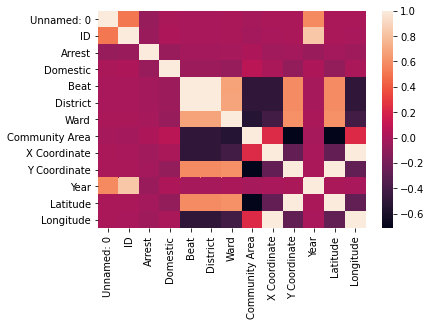

In [24]:
sns.heatmap(df.corr())

### The whiter spots shows higher correlation

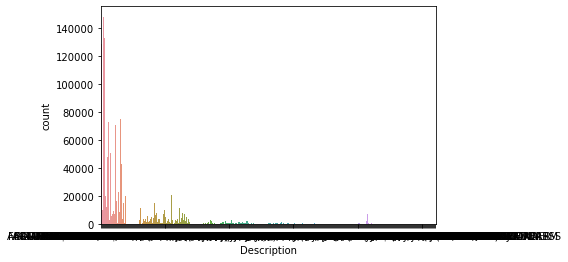

In [25]:
sns.countplot("Description", data = df1)

## Top 5 crimes in Chicago

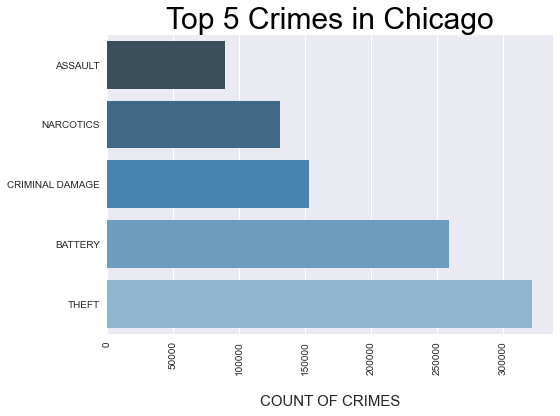

In [26]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 5 crimes
top_5_crimes = df['Primary Type'].value_counts().sort_values(ascending=False).head()

temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Primary Type', data=temp, palette="Blues_d")

# Work on the aestehtic appeal of the plot
plt.title("Top 5 Crimes in Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()
#plt.show()

## Likelihood of an arrest

In [30]:
# df['Arrest'].head()
l = df["Arrest"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Percentage of no arrests of all reported crimes :",false/(false+true)*100,'!')

Percentage of no arrests of all reported crimes : 73.83910347477554 !


In [ ]:
df1.head()